In [1]:
import sys
import os
sys.path.append('..')
import numpy as np
import pandas as pd
from models import sir
from config import get_project_root

In [2]:
DATA_FOLDER = f'{get_project_root()}/data'
INFECTADOS_PATH = f'{DATA_FOLDER}/preprocessed/infectados.csv'
HABITANTES_PATH = f'{DATA_FOLDER}/preprocessed/habitantes.csv'
VACUNADOS_PATH = f'{DATA_FOLDER}/preprocessed/vacunados.csv'
YEARS = [2018, 2019, 2020, 2021, 2022]
MONTHS = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGOS', 'SEP', 'OCT', 'NOV', 'DIC']

In [3]:
susceptible_curve = pd.read_csv(HABITANTES_PATH).set_index('ANO')
for month in MONTHS:
    susceptible_curve[month] = susceptible_curve['JUL']

In [4]:
def extract_curve(path=None, df=None):
    if df is None:
        df = pd.read_csv(path).set_index('ANO')
    df = df[df.columns[:12]].T
    values = []
    for year in YEARS:
        values.extend(df[year].tolist())
    return pd.Series(values)

infectuous_curve = extract_curve(path=INFECTADOS_PATH)
susceptible_curve = extract_curve(df=susceptible_curve)

initial_params=(susceptible_curve[0], 12,0)

In [5]:
initial_params

(10973470, 12, 0)

In [6]:
generations = np.arange(0, 60)

In [7]:
model = sir.SIR(initial_params=initial_params, initial_population_size=susceptible_curve[0], generations=generations)

In [8]:
import itertools
R0 = 1
t_infectious=0.1
best = np.inf
final_params = (R0, t_infectious)
for R0, t_infectious in itertools.product(np.linspace(0.1, 20, num=50), np.linspace(0.1, 1, num=30)):
    print(f"\nTrying R0: {R0} and t_inf: {t_infectious}\n")
    model.estimate_parameters_from_R0(t_infectious=t_infectious, R0=R0)
    model.solve()
    loss = model.loss(susceptible_curve.to_numpy(), infectuous_curve.to_numpy())
    print(f"\nLoss is : {loss}\n")
    if loss < best:
        final_params = (R0, t_infectious)
        best = loss


Trying R0: 0.1 and t_inf: 0.1


Loss is : 7239296761668422.0


Trying R0: 0.1 and t_inf: 0.1310344827586207


Loss is : 7264364435110438.0


Trying R0: 0.1 and t_inf: 0.16206896551724137


Loss is : 7290517633635579.0


Trying R0: 0.1 and t_inf: 0.19310344827586207


Loss is : 7317256193396358.0


Trying R0: 0.1 and t_inf: 0.22413793103448276


Loss is : 7344344470676117.0


Trying R0: 0.1 and t_inf: 0.25517241379310346


Loss is : 7371657774837000.0


Trying R0: 0.1 and t_inf: 0.28620689655172415


Loss is : 7399124189107867.0


Trying R0: 0.1 and t_inf: 0.3172413793103448


Loss is : 7426699405291288.0


Trying R0: 0.1 and t_inf: 0.34827586206896555


Loss is : 7454354667528889.0


Trying R0: 0.1 and t_inf: 0.3793103448275862


Loss is : 7482070513196408.0


Trying R0: 0.1 and t_inf: 0.41034482758620694


Loss is : 7509833305317725.0


Trying R0: 0.1 and t_inf: 0.4413793103448276


Loss is : 7537633206271008.0


Trying R0: 0.1 and t_inf: 0.4724137931034482


Loss is : 75654629383439



Trying R0: 1.7244897959183674 and t_inf: 0.34827586206896555


Loss is : 7454354667528889.0


Trying R0: 1.7244897959183674 and t_inf: 0.3793103448275862


Loss is : 7482070513196408.0


Trying R0: 1.7244897959183674 and t_inf: 0.41034482758620694


Loss is : 7509833305317725.0


Trying R0: 1.7244897959183674 and t_inf: 0.4413793103448276


Loss is : 7537633206271008.0


Trying R0: 1.7244897959183674 and t_inf: 0.4724137931034482


Loss is : 7565462938343915.0


Trying R0: 1.7244897959183674 and t_inf: 0.503448275862069


Loss is : 7593316994942060.0


Trying R0: 1.7244897959183674 and t_inf: 0.5344827586206896


Loss is : 7621191117829783.0


Trying R0: 1.7244897959183674 and t_inf: 0.5655172413793104


Loss is : 7649081938753007.0


Trying R0: 1.7244897959183674 and t_inf: 0.596551724137931


Loss is : 7676986723272416.0


Trying R0: 1.7244897959183674 and t_inf: 0.6275862068965516


Loss is : 7704903180628140.0


Trying R0: 1.7244897959183674 and t_inf: 0.6586206896551724


Loss i



Trying R0: 3.3489795918367347 and t_inf: 0.5344827586206896


Loss is : 7621191117829783.0


Trying R0: 3.3489795918367347 and t_inf: 0.5655172413793104


Loss is : 7649081938753007.0


Trying R0: 3.3489795918367347 and t_inf: 0.596551724137931


Loss is : 7676986723272416.0


Trying R0: 3.3489795918367347 and t_inf: 0.6275862068965516


Loss is : 7704903180628140.0


Trying R0: 3.3489795918367347 and t_inf: 0.6586206896551724


Loss is : 7732829317842877.0


Trying R0: 3.3489795918367347 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 3.3489795918367347 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 3.3489795918367347 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 3.3489795918367347 and t_inf: 0.7827586206896552


Loss is : 7844595343250683.0


Trying R0: 3.3489795918367347 and t_inf: 0.8137931034482758


Loss is : 7872543441750426.0


Trying R0: 3.3489795918367347 and t_inf: 0.8448275862068965


Loss is 



Trying R0: 4.9734693877551015 and t_inf: 0.5344827586206896


Loss is : 7621191117829783.0


Trying R0: 4.9734693877551015 and t_inf: 0.5655172413793104


Loss is : 7649081938753007.0


Trying R0: 4.9734693877551015 and t_inf: 0.596551724137931


Loss is : 7676986723272416.0


Trying R0: 4.9734693877551015 and t_inf: 0.6275862068965516


Loss is : 7704903180628140.0


Trying R0: 4.9734693877551015 and t_inf: 0.6586206896551724


Loss is : 7732829317842877.0


Trying R0: 4.9734693877551015 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 4.9734693877551015 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 4.9734693877551015 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 4.9734693877551015 and t_inf: 0.7827586206896552


Loss is : 7844595343250683.0


Trying R0: 4.9734693877551015 and t_inf: 0.8137931034482758


Loss is : 7872543441750426.0


Trying R0: 4.9734693877551015 and t_inf: 0.8448275862068965


Loss is 



Trying R0: 6.597959183673469 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 6.597959183673469 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 6.597959183673469 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 6.597959183673469 and t_inf: 0.7827586206896552


Loss is : 7844595343250683.0


Trying R0: 6.597959183673469 and t_inf: 0.8137931034482758


Loss is : 7872543441750426.0


Trying R0: 6.597959183673469 and t_inf: 0.8448275862068965


Loss is : 7900490372314159.0


Trying R0: 6.597959183673469 and t_inf: 0.8758620689655172


Loss is : 7928433975730052.0


Trying R0: 6.597959183673469 and t_inf: 0.9068965517241379


Loss is : 7956371906365998.0


Trying R0: 6.597959183673469 and t_inf: 0.9379310344827586


Loss is : 7984301620173374.0


Trying R0: 6.597959183673469 and t_inf: 0.9689655172413792


Loss is : 8012220369157018.0


Trying R0: 6.597959183673469 and t_inf: 1.0


Loss is : 8040125202347335.0


Tr



Trying R0: 8.222448979591837 and t_inf: 0.9068965517241379


Loss is : 7956371906365998.0


Trying R0: 8.222448979591837 and t_inf: 0.9379310344827586


Loss is : 7984301620173374.0


Trying R0: 8.222448979591837 and t_inf: 0.9689655172413792


Loss is : 8012220369157018.0


Trying R0: 8.222448979591837 and t_inf: 1.0


Loss is : 8040125202347335.0


Trying R0: 8.628571428571428 and t_inf: 0.1


Loss is : 7239296761668422.0


Trying R0: 8.628571428571428 and t_inf: 0.1310344827586207


Loss is : 7264364435110438.0


Trying R0: 8.628571428571428 and t_inf: 0.16206896551724137


Loss is : 7290517633635579.0


Trying R0: 8.628571428571428 and t_inf: 0.19310344827586207


Loss is : 7317256193396358.0


Trying R0: 8.628571428571428 and t_inf: 0.22413793103448276


Loss is : 7344344470676117.0


Trying R0: 8.628571428571428 and t_inf: 0.25517241379310346


Loss is : 7371657774837000.0


Trying R0: 8.628571428571428 and t_inf: 0.28620689655172415


Loss is : 7399124189107867.0


Trying R0: 



Trying R0: 9.846938775510203 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 9.846938775510203 and t_inf: 0.7827586206896552


Loss is : 7844595343250683.0


Trying R0: 9.846938775510203 and t_inf: 0.8137931034482758


Loss is : 7872543441750426.0


Trying R0: 9.846938775510203 and t_inf: 0.8448275862068965


Loss is : 7900490372314159.0


Trying R0: 9.846938775510203 and t_inf: 0.8758620689655172


Loss is : 7928433975730052.0


Trying R0: 9.846938775510203 and t_inf: 0.9068965517241379


Loss is : 7956371906365998.0


Trying R0: 9.846938775510203 and t_inf: 0.9379310344827586


Loss is : 7984301620173374.0


Trying R0: 9.846938775510203 and t_inf: 0.9689655172413792


Loss is : 8012220369157018.0


Trying R0: 9.846938775510203 and t_inf: 1.0


Loss is : 8040125202347335.0


Trying R0: 10.253061224489795 and t_inf: 0.1


Loss is : 7239296761668422.0


Trying R0: 10.253061224489795 and t_inf: 0.1310344827586207


Loss is : 7264364435110438.0


Trying R0: 10.



Trying R0: 11.47142857142857 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 11.47142857142857 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 11.47142857142857 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 11.47142857142857 and t_inf: 0.7827586206896552


Loss is : 7844595343250683.0


Trying R0: 11.47142857142857 and t_inf: 0.8137931034482758


Loss is : 7872543441750426.0


Trying R0: 11.47142857142857 and t_inf: 0.8448275862068965


Loss is : 7900490372314159.0


Trying R0: 11.47142857142857 and t_inf: 0.8758620689655172


Loss is : 7928433975730052.0


Trying R0: 11.47142857142857 and t_inf: 0.9068965517241379


Loss is : 7956371906365998.0


Trying R0: 11.47142857142857 and t_inf: 0.9379310344827586


Loss is : 7984301620173374.0


Trying R0: 11.47142857142857 and t_inf: 0.9689655172413792


Loss is : 8012220369157018.0


Trying R0: 11.47142857142857 and t_inf: 1.0


Loss is : 8040125202347335.0


Tr



Trying R0: 13.095918367346938 and t_inf: 0.4724137931034482


Loss is : 7565462938343915.0


Trying R0: 13.095918367346938 and t_inf: 0.503448275862069


Loss is : 7593316994942060.0


Trying R0: 13.095918367346938 and t_inf: 0.5344827586206896


Loss is : 7621191117829783.0


Trying R0: 13.095918367346938 and t_inf: 0.5655172413793104


Loss is : 7649081938753007.0


Trying R0: 13.095918367346938 and t_inf: 0.596551724137931


Loss is : 7676986723272416.0


Trying R0: 13.095918367346938 and t_inf: 0.6275862068965516


Loss is : 7704903180628140.0


Trying R0: 13.095918367346938 and t_inf: 0.6586206896551724


Loss is : 7732829317842877.0


Trying R0: 13.095918367346938 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 13.095918367346938 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 13.095918367346938 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 13.095918367346938 and t_inf: 0.7827586206896552


Loss is :



Trying R0: 14.720408163265306 and t_inf: 0.6275862068965516


Loss is : 7704903180628140.0


Trying R0: 14.720408163265306 and t_inf: 0.6586206896551724


Loss is : 7732829317842877.0


Trying R0: 14.720408163265306 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 14.720408163265306 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 14.720408163265306 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 14.720408163265306 and t_inf: 0.7827586206896552


Loss is : 7844595343250683.0


Trying R0: 14.720408163265306 and t_inf: 0.8137931034482758


Loss is : 7872543441750426.0


Trying R0: 14.720408163265306 and t_inf: 0.8448275862068965


Loss is : 7900490372314159.0


Trying R0: 14.720408163265306 and t_inf: 0.8758620689655172


Loss is : 7928433975730052.0


Trying R0: 14.720408163265306 and t_inf: 0.9068965517241379


Loss is : 7956371906365998.0


Trying R0: 14.720408163265306 and t_inf: 0.9379310344827586


Loss is



Trying R0: 16.344897959183676 and t_inf: 0.596551724137931


Loss is : 7676986723272416.0


Trying R0: 16.344897959183676 and t_inf: 0.6275862068965516


Loss is : 7704903180628140.0


Trying R0: 16.344897959183676 and t_inf: 0.6586206896551724


Loss is : 7732829317842877.0


Trying R0: 16.344897959183676 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 16.344897959183676 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 16.344897959183676 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 16.344897959183676 and t_inf: 0.7827586206896552


Loss is : 7844595343250683.0


Trying R0: 16.344897959183676 and t_inf: 0.8137931034482758


Loss is : 7872543441750426.0


Trying R0: 16.344897959183676 and t_inf: 0.8448275862068965


Loss is : 7900490372314159.0


Trying R0: 16.344897959183676 and t_inf: 0.8758620689655172


Loss is : 7928433975730052.0


Trying R0: 16.344897959183676 and t_inf: 0.9068965517241379


Loss is 



Trying R0: 17.96938775510204 and t_inf: 0.4413793103448276


Loss is : 7537633206271008.0


Trying R0: 17.96938775510204 and t_inf: 0.4724137931034482


Loss is : 7565462938343915.0


Trying R0: 17.96938775510204 and t_inf: 0.503448275862069


Loss is : 7593316994942060.0


Trying R0: 17.96938775510204 and t_inf: 0.5344827586206896


Loss is : 7621191117829783.0


Trying R0: 17.96938775510204 and t_inf: 0.5655172413793104


Loss is : 7649081938753007.0


Trying R0: 17.96938775510204 and t_inf: 0.596551724137931


Loss is : 7676986723272416.0


Trying R0: 17.96938775510204 and t_inf: 0.6275862068965516


Loss is : 7704903180628140.0


Trying R0: 17.96938775510204 and t_inf: 0.6586206896551724


Loss is : 7732829317842877.0


Trying R0: 17.96938775510204 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 17.96938775510204 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 17.96938775510204 and t_inf: 0.7517241379310344


Loss is : 7816648069



Trying R0: 19.59387755102041 and t_inf: 0.6275862068965516


Loss is : 7704903180628140.0


Trying R0: 19.59387755102041 and t_inf: 0.6586206896551724


Loss is : 7732829317842877.0


Trying R0: 19.59387755102041 and t_inf: 0.689655172413793


Loss is : 7760763324042402.0


Trying R0: 19.59387755102041 and t_inf: 0.7206896551724138


Loss is : 7788703477680953.0


Trying R0: 19.59387755102041 and t_inf: 0.7517241379310344


Loss is : 7816648069931456.0


Trying R0: 19.59387755102041 and t_inf: 0.7827586206896552


Loss is : 7844595343250683.0


Trying R0: 19.59387755102041 and t_inf: 0.8137931034482758


Loss is : 7872543441750426.0


Trying R0: 19.59387755102041 and t_inf: 0.8448275862068965


Loss is : 7900490372314159.0


Trying R0: 19.59387755102041 and t_inf: 0.8758620689655172


Loss is : 7928433975730052.0


Trying R0: 19.59387755102041 and t_inf: 0.9068965517241379


Loss is : 7956371906365998.0


Trying R0: 19.59387755102041 and t_inf: 0.9379310344827586


Loss is : 79843016

In [9]:
best

7239296761668422.0

In [10]:
final_params

(15, 0.1)

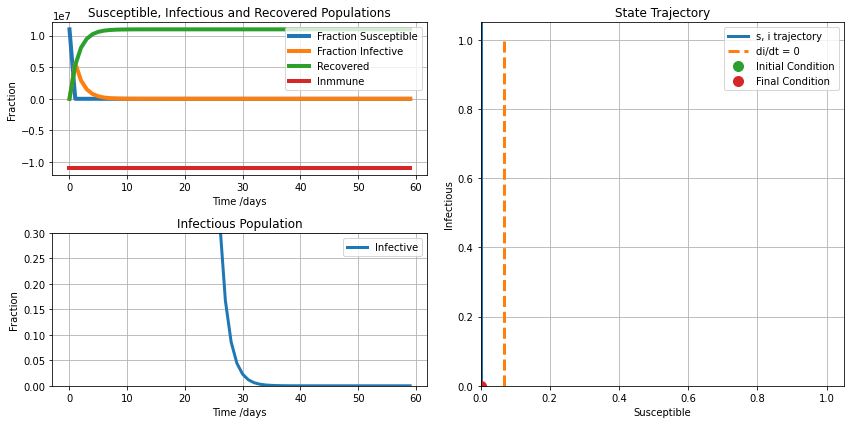

In [11]:
model.estimate_parameters_from_R0(t_infectious=final_params[1], R0=final_params[0])
model.solve()
model.plotdata()